# COMP3314 Assignment2-Q3: Dimension Reduction (30 Points）

In this part, you are required to conduct dimension reduction.

1. draw digits
2. pca before and after, draw digits
3. t-sne
4. 2-d pca
5. PCA evaluation

### Step 1: Download dataset
Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). In this experiment, we'll only be using the test set.

In [16]:
import tensorflow as tf
import numpy as np

(xs_train, ys_train), (xs_test, ys_test) = tf.keras.datasets.mnist.load_data()

# We'll only be using the test set.
xs = xs_test.reshape((xs_test.shape[0], -1))
ys = ys_test

print(f"xs shape: {xs.shape}")
print(f"ys shape: {ys.shape}")

xs shape: (10000, 784)
ys shape: (10000,)


### Step 2: Visualize digits (2 Points)

Each hand-written MNIST digit is a 28x28 matrix. For each digit (0, 1, 2, ..., 9), pick one sample to visualize.

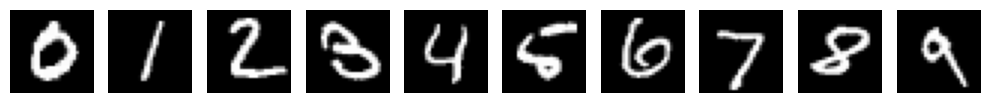

In [17]:

# Your code here.
import matplotlib.pyplot as plt

# Visualize the first 10 digits in the dataset.
def visualize_mnist_digits(xs, ys):
    plt.figure(figsize=(10, 2))
    for digit in range(10):
        plt.subplot(1, 10, digit + 1)
        plt.imshow(xs[np.where(ys == digit)[0][0]].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_mnist_digits(xs, ys_test)


### Step 3: PCA projection and recovery (8 Points)

The original dataset has 28x28=784 feature dimensions.

1. Use PCA to reduce the feature dimensions to [400, 200, 100, 50], respectively.
2. From the reduced dimension data, reproject the data back to 784 dimensions. Plot the results of the reprojected digits. For each PCA dimension, you should plot digits from 0-9, similar to step 2.

Plotting digits for PCA with 400 components:


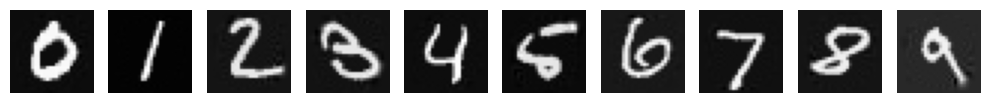

Plotting digits for PCA with 200 components:


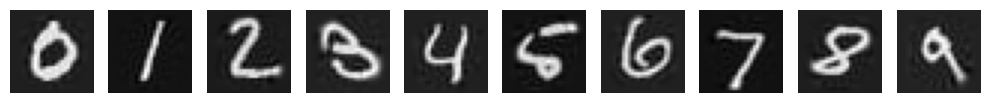

Plotting digits for PCA with 100 components:


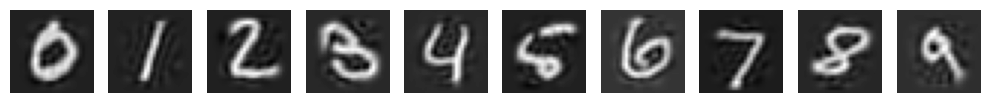

Plotting digits for PCA with 50 components:


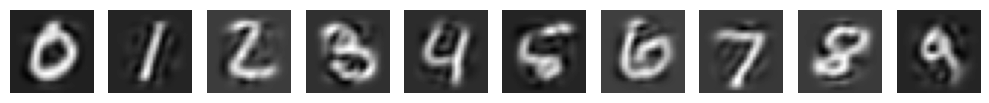

In [18]:
from sklearn.decomposition import PCA

# Your code here.

# Apply PCA and plot the digits for each of the following dimensions: 400, 200, 100, 50.
def apply_pca_and_plot(xs, ys, dimensions):
    for dim in dimensions:
        pca = PCA(n_components=dim)
        xs_reduced = pca.fit_transform(xs)
        xs_reprojected = pca.inverse_transform(xs_reduced)
        print(f"Plotting digits for PCA with {dim} components:")
        visualize_mnist_digits(xs_reprojected, ys)

dimensions = [400, 200, 100, 50]
apply_pca_and_plot(xs, ys_test, dimensions)


### Step 4: t-SNE visualization (8 Points)

Use t-SNE to reduce the MNIST dataset down to 2 dimensions and plot the result using Matplotlib. You should clearly see clusters of the digits from the visualization.

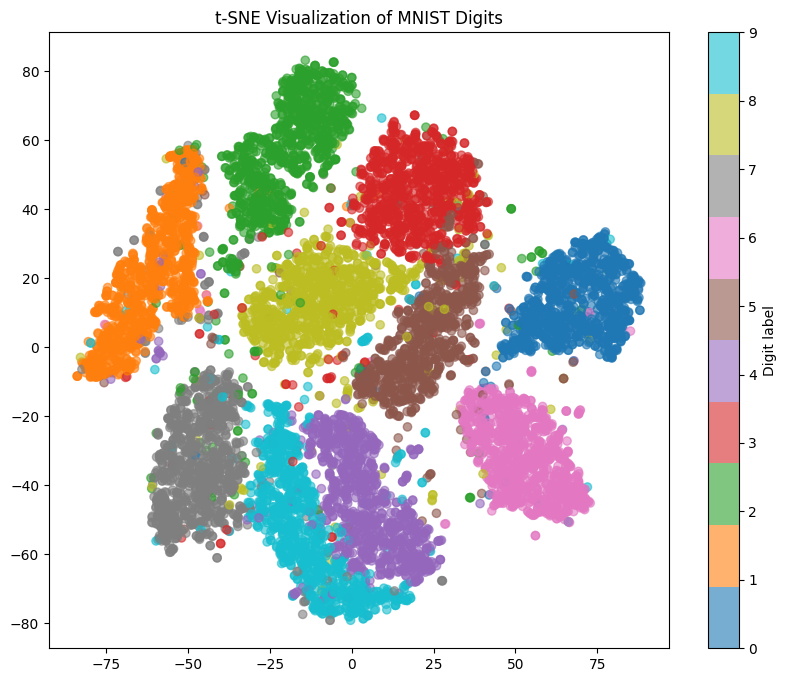

In [19]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Your code here.

# Apply t-SNE and plot the digits.
def apply_tsne_and_plot(xs, ys):
    tsne = TSNE(n_components=2, random_state=1)
    xs_tsne = tsne.fit_transform(xs)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(xs_tsne[:, 0], xs_tsne[:, 1], c=ys, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter, label='Digit label')
    plt.title("t-SNE Visualization of MNIST Digits")
    plt.show()

apply_tsne_and_plot(xs, ys_test)


### Step 5: PCA visualization (8 Points) 

Next, let's use PCA to project the data to 2 dimension. Visualize the 2D data again. Which one performs better, t-SNE or PCA?

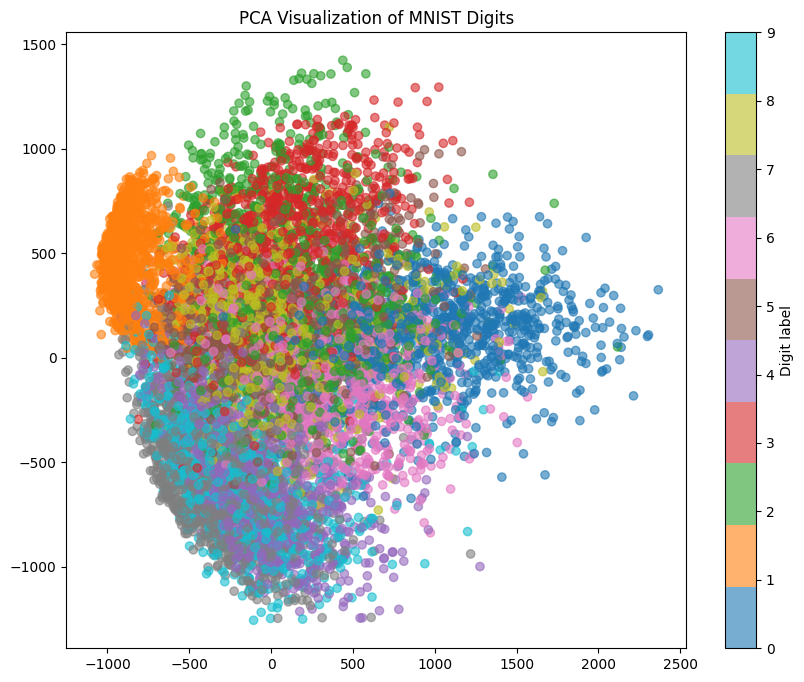

In [20]:
# Your code here.

# Apply PCA and plot the digits in 2D.
def apply_pca_2d_and_plot(xs, ys):
    pca = PCA(n_components=2)
    xs_pca = pca.fit_transform(xs)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(xs_pca[:, 0], xs_pca[:, 1], c=ys, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter, label='Digit label')
    plt.title("PCA Visualization of MNIST Digits")
    plt.show()

apply_pca_2d_and_plot(xs, ys_test)


#### Comparison

- t-SNE gives better-separated clusters with less overlap between digits.
- t-SNE produces more compact clusters, whereas PCA clusters are more spread out.
- t-SNE shows fewer outliers than PCA.

### Step 6: PCA evaluation (4 Points)

Now you have projected the data to 2 dimension using PCA. 
Let's discuss how to evaluate the performance of this PCA results (with different numbers of components) for dimension reduction. 

Your tasks:

1. Propose a suitable metric (e.g., a scalar score) to evaluate the PCA performance. (2 Points)
2. Implement it (you are allowed to import the external packages) and give the quatitative result. (2 Points)

In [21]:
# Your code here.

# Evaluate the performance of PCA with different number of components.
def evaluate_pca_performance(xs, components_list):
    for n_components in components_list:
        pca = PCA(n_components=n_components)
        pca.fit(xs)
        explained_variance = np.sum(pca.explained_variance_ratio_)
        print(f"PCA with {n_components} components explains {explained_variance:.4f} of the variance.")

components_list = [400, 200, 100, 50, 2]
evaluate_pca_performance(xs, components_list)


PCA with 400 components explains 0.9963 of the variance.
PCA with 200 components explains 0.9683 of the variance.
PCA with 100 components explains 0.9184 of the variance.
PCA with 50 components explains 0.8316 of the variance.
PCA with 2 components explains 0.1759 of the variance.


#### Explanation

- Use **Explained Variance Ratio** to evaluate PCA performance.
- The explained variance ratio tells us how much of the total variance in the data is retained after projecting to a lower dimension.